In [ ]:
#model_from_json will create our own json file for neural network model
#if matplot is not working, we can access from pylab

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
#or
import pylab as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [ ]:
#We are using grey scale image so height and width = 128*128 = 784
#Convert image into low resolution to handle the model effectively
#Make the image into index i.e. 255 for 256 pixel image

batch_size = 128
num_classes = 10 # i.e. 0 to 9
epochs = 2

#Split the data between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) #train 60,000 data
x_test = x_test.reshape(10000, 784) #test 10,000 data
x_train = x_train.astype('float32') #reduce the resolution
x_test = x_test.astype('float32')

#Normalize to 0 to 1 range
x_train /= 255
x_test /=255
print(x_train.shape[0], 'train samples')
print(x_test.shape [0], 'test samples')

#Convert class vectors to binaly class matrices
y_train = keras.utils.to_categorical(y_train, num_classes) #predefined keras categorical model to define label
y_test = keras.utils.to_categorical (y_test, num_classes)

60000 train samples
10000 test samples


Label: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


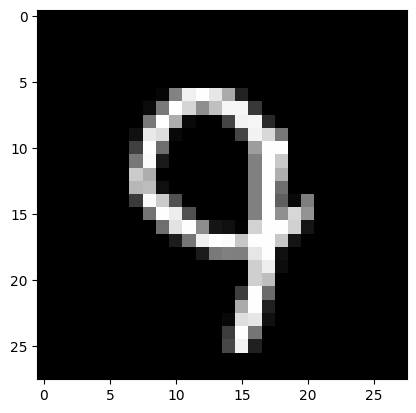

In [ ]:
#Check the particular image and the corresponding class
#999th image out of 1000s image to reshape into 28*28

print("Label:", y_test[999:1000])
plt.imshow(x_test[999:1000].reshape(28,28), cmap = 'gray')
plt.show()

Label: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


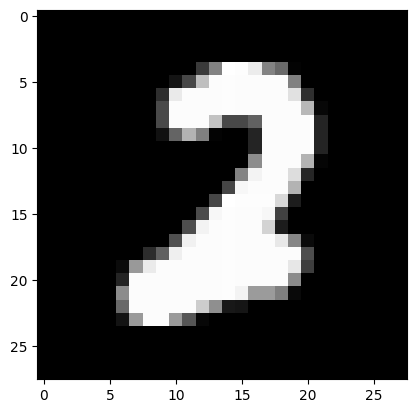

In [ ]:
print("Label:", y_test[199:200]) #Verifying one image
plt.imshow(x_test[199:200].reshape(28,28), cmap = 'gray')
plt.show()

In [ ]:
#Input Layer 784 features tranfering to 32 neurons
#Two hidden layers with 32 neurons
# Output layer softmax

first_layer_size = 32
model = Sequential ()
model.add(Dense(first_layer_size, activation = 'sigmoid', input_shape = (784,)))#It's one dimension so not mentioning 784, 'empty'
model.add (Dense(32, activation = 'sigmoid'))
model.add (Dense(32, activation = 'sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary() #code to summarize the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#dense (Dense) is input layer
#dense_1 (Dense) is hidden layer 1
#dense_2 (Dense) is hidden layer 2
#dense_3 (Dense) is output layer

# 784 * 32 is transferred to hidden layer = 25,088 + 32 = 25,120 is how parameters is defined
# 784 is 28*28 features
# 32 * 32 is transferred into hidden layer = 1024 + 32 = 1,056 same for second hidden layer
# 32 * 10 is transferred into output layer = 320 + 10 weightage = 330

Shape of First Layer (784, 32)
Visualization of First Layer


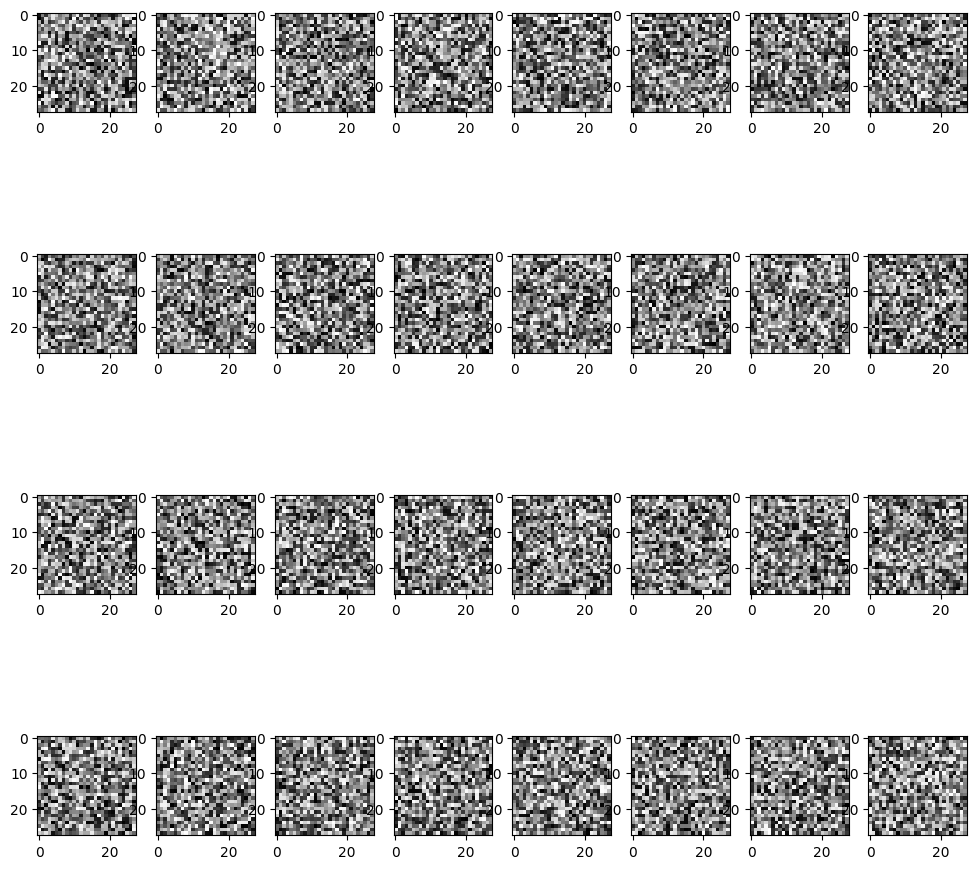

In [ ]:
# Fix array for the layer
# Assign the weight
# Convert figure into size 12*12 consisting 8 images in 1 row

w = []
for layer in model.layers:
  weights = layer.get_weights()
  w.append (weights)
layer1 = np.array(w[0][0])
print("Shape of First Layer", layer1.shape)
print("Visualization of First Layer")
fig = plt.figure(figsize = (12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range (1, columns*rows + 1):
  fig.add_subplot(rows, columns, i)
  plt.imshow (layer1 [:, i-1]. reshape (28,28), cmap = 'gray')
plt.show()

In [ ]:
#All patterns are same because we haven't trained the model

In [ ]:
#Compilation of code
model.compile (loss = 'categorical_crossentropy',
               optimizer = RMSprop(),
               metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs=epochs,
                    verbose = 1)

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.2691 - accuracy: 0.9274
Epoch 2/2
469/469 [==============================] - 2s 3ms/step - loss: 0.2288 - accuracy: 0.9366


Shape of First Layer (784, 32)
Visualization of First Layer


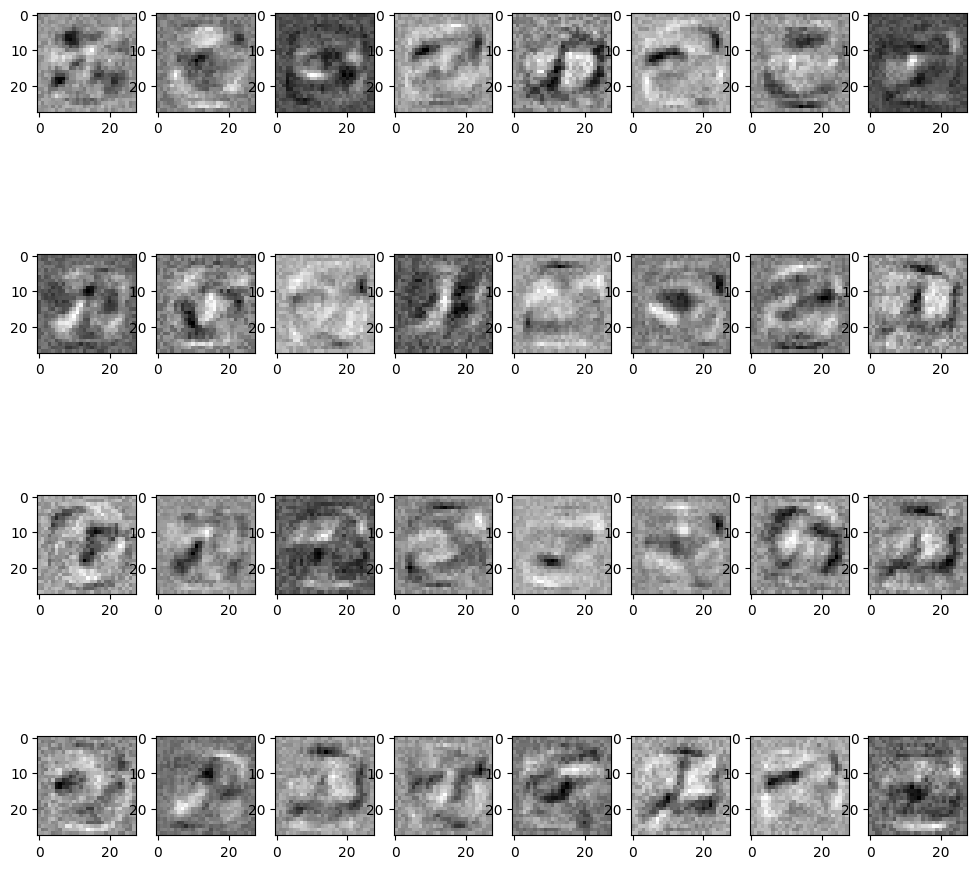

In [ ]:
# Code after training
w = []
for layer in model.layers:
  weights = layer.get_weights()
  w.append (weights)
layer1 = np.array(w[0][0])
print("Shape of First Layer", layer1.shape)
print("Visualization of First Layer")
fig = plt.figure(figsize = (12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range (1, columns*rows + 1):
  fig.add_subplot(rows, columns, i)
  plt.imshow (layer1 [:, i-1]. reshape (28,28), cmap = 'gray')
plt.show()

In [ ]:
prediction = model.predict (x_test[199:200])
prediction = prediction[0]
print('Prediction\n', prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 98ms/step
Prediction
 [7.7000255e-04 5.7514978e-04 9.8804259e-01 6.0677547e-03 5.1158659e-05
 1.7560576e-04 9.6392975e-04 2.6641744e-03 6.2983623e-04 5.9838712e-05]

Thresholded output
 [0 0 1 0 0 0 0 0 0 0]


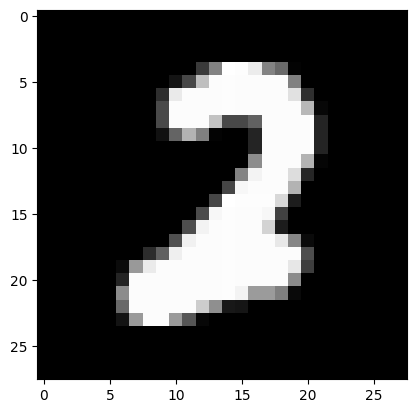

In [ ]:
plt.imshow(x_test[199:200].reshape(28,28),cmap = 'gray')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digit.jpg to digit.jpg


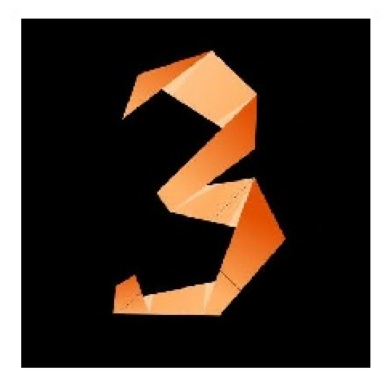

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as pyplot

#Load image in color
image_bgr = cv2.imread('digit.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)) #Conversion of BGR to RGB
plt.axis('off')
plt.show()

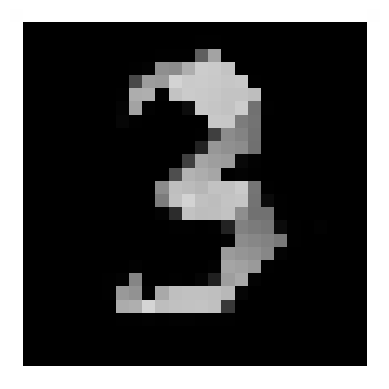

In [ ]:
#Noise Reduction Process
image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28,28))
plt.imshow(image_resized, cmap = 'gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n', prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n', thresholded[0])
print('\nPredicted Digit:\n', np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 107ms/step
Prediction Score:
 [2.7579474e-05 3.0810991e-02 1.0004746e-01 8.2820261e-01 1.4333041e-06
 1.8797563e-03 2.4883424e-05 1.8322112e-03 3.6960840e-02 2.1230552e-04]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digitseven.jpg to digitseven.jpg


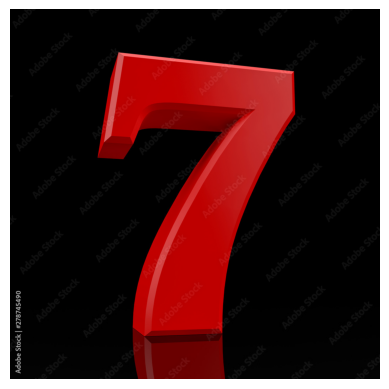

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as pyplot

#Load image in color
image_bgr = cv2.imread('digitseven.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)) #Conversion of BGR to RGB
plt.axis('off')
plt.show()

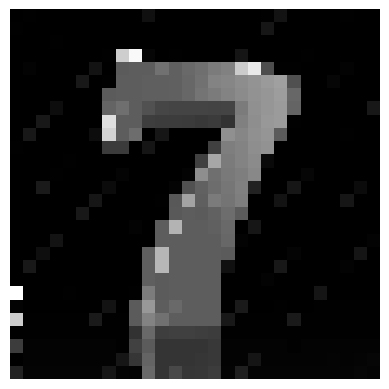

In [ ]:
#Noise Reduction Process, do image processing code
image = cv2.imread('digitseven.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28,28))
plt.imshow(image_resized, cmap = 'gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n', prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n', thresholded[0])
print('\nPredicted Digit:\n', np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 22ms/step
Prediction Score:
 [1.1560705e-03 3.7233981e-03 7.6261812e-01 1.8428986e-01 1.8873925e-05
 9.5512217e-04 9.0025460e-05 3.3134803e-02 1.2787841e-02 1.2259333e-03]

Thresholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit:
 2


In [ ]:
#The Predicted Digit is 2 because there is a noise in the picture with watermark and 7 seems like 2

In [ ]:
model_json = model.to_json()
# Write the file name of the model
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#Serialization weights to HDF5
# Write th file name of the weights
model.save_weights("model.h5")
print("saved model to disk")

saved model to disk


In [ ]:
#load json and create model

#Write the file name of the model
json_file=open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

#This will help to restart the training from the model we left last time

Loaded model from disk
